# The Role of Africa in Reducing World Hunger
## By Stephanie Netoafomachukwu Anyama.

  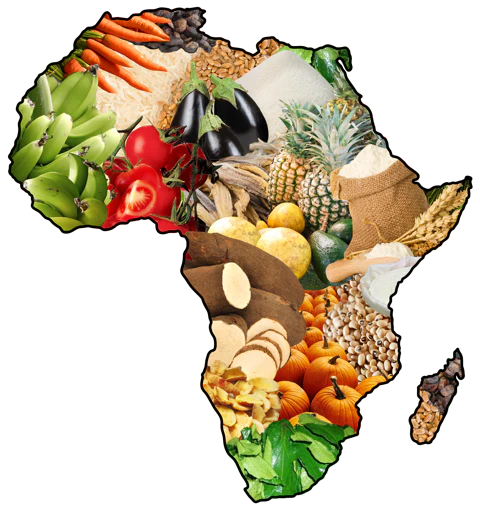

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#discussion"> Visualization and Discussion</a></li>   
<li><a href="#conclusion">Recommendations and Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
Agriculture has been known to be the mainstay of the economies of African countries, mainly Sub-Saharan African countries. According to a [book](https://www.ifpri.org/publication/agricultural-productivity-africa-trends-patterns-and-determinants) written on African agricultural productivity in 2016, agricultural productivity in Africa increased at a moderate rate between 1961 and 2012, although there are variations in the rate of growth in land, labor, and total factor productivities depending on country and region.

According to [Action Against Hunger](https://www.actionagainsthunger.org/the-hunger-crisis/world-hunger-facts/#:~:text=Global%20hunger%20crisis%20in%202023,and%20the%20COVID%2D19%20pandemic.), after steadily declining for a decade, world hunger is said to be on the rise, affecting nearly 10% of people globally. From 2019 to 2022, the number of undernourished people grew by as many as 150 million, a crisis driven largely by conflict, climate change, and the COVID-19 pandemic.

Therefore, in this project, I seek to find out for myself these trends in food production and supply, specifically between the years 2004 and 2013. I also aim to describe how Africa can contribute to reducing world hunger. This will be covered according to the sections as listed above.

### Features of the Datasets.
There were two datasets provided for this project. The first one covered the figures of food production, while the second covered food supply across 45 African countries.

##### Food Production Dataset:
1. Country: The name of the country.
2. Item: The name of the produce from each country.
3. Year: The year of production.
4. Value: The quantity of each item, measured in kilotonnes (kt).

##### Food Supply Dataset:
1. Country: The name of the country.
2. Year: The year of supply.
3. Value: The quantity supplied, measured in kilocalories per person per day (kcal/person/day).

> All wrangling was carried out before the deployment of these slides.

### Preliminary Wrangling.
In this section, I gathered, assessed and cleaned the provided datasets. To gather, I read them into two different datasets, `df1` for production and `df2` for supply.

In [ ]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import patheffects
import folium
import geopandas as gpd
import os
import plotly.express as px

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

%matplotlib inline

In [ ]:
#reading the production dataset into df1
df1 = pd.read_csv('/Users/netoa/Downloads/african_food_production.csv')
df1

In [ ]:
#reading the supply dataset into df2
df2 = pd.read_csv('/Users/netoa/Downloads/african_food_supply.csv')
df2

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
sum(df1.duplicated())

In [ ]:
sum(df2.duplicated())

After assessing the data, I decided to make a single change: to change the year column in both datasets to an ordered categorical column.

##### Define:
Change the year column in both datasets to an ordered categorical column.

##### Code:

In [ ]:
ordinal_vars = {'Year': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]}
for var in ordinal_vars:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_vars[var])
    df1[var] = df1[var].astype(ordered_var)

In [ ]:
ordinal_var2 = {'Year': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]}
for var in ordinal_var2:
    ordered_v = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var2[var])
    df2[var] = df2[var].astype(ordered_v)

##### Test:

In [ ]:
df1.info()

In [ ]:
df2.info()

In [ ]:
df3 = pd.DataFrame(df1.groupby('Year').mean().Value)
df3

In [ ]:
df4 = pd.DataFrame(df2.groupby('Year').mean().Value)
df4

In [ ]:
avg_vals = df3.merge(df4, on='Year')
avg_vals

In [ ]:
avg_vals.rename(columns={'Value_x':'avg_prod', 'Value_y':'avg_supp'}, inplace=True)

<a id='discussion'></a>
## Visualization and Discussion.

In order for us to arrive at a definitive conclusion regarding the food production and supply trends in Africa from 2004 to 2013, certain questions needed to be asked of the data. These questions are listed below.
1. What are the highest producing countries by year?
2. What countries supply the most food per capita?
3. What is the relationship between average food production and average food supply?
4. What were the yearly trends in total food production and supply?
5. What items were most produced?
6. What items were least produced?
7. Which countries produce and supply the most unique products?

> All visualizations are sub-slides of their discussion slides. Click down to view.

### What are the highest producing countries?
According to the map of Africa in the next slide, showing the spread of total food production, it is observed that __Nigeria, Egypt, and South Africa__ produced the highest amounts of food with __1,628,030, 877,498, and 579,592 kt__ respectively. 

In [ ]:
# set the filepath and load
fp = '/Users/netoa/Downloads/afr_g2014_2013_0/afr_g2014_2013_0.shp'
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

In [ ]:
prods = pd.DataFrame(df1.groupby('Country').sum().Value)

In [ ]:
prods.to_csv('prods_csv')

In [ ]:
prd = pd.read_csv('prods_csv')

In [ ]:
map_df.ADM0_NAME.replace("Cï¿½te d'Ivoire","Cote d'Ivoire", inplace=True)
map_df.ADM0_NAME.replace('Cape Verde', 'Cabo Verde', inplace=True)

In [ ]:
map_df = map_df.sort_values(by=['ADM0_NAME'], ascending=True)
map_df

In [ ]:
merged = map_df.set_index('ADM0_NAME').join(prd.set_index('Country'))

In [ ]:
merged

In [ ]:
merged.Value.fillna(0, inplace=True)

In [ ]:
fig = px.choropleth(merged,
                   geojson=merged.geometry,
                   locations=merged.index,
                   color="Value",
                    labels={"Value": "Quantity Produced(kt)"},
                title="Amount of Food Produced by Country",
                    color_continuous_scale=px.colors.sequential.Greens,
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

### What countries supply the most food per capita?

From the map showing the spread of the total food supplied per capita per day, it is clearly seen that __Egypt, Algeria, and Morocco__ supplied the most food per capita with __34,580, 33,055, and 32,967 kcal/person/day__ respectively. This is in spite of the fact that Algeria and Morocco did not produce the most food.

In [ ]:
supp = pd.DataFrame(df2.groupby('Country').sum().Value)

In [ ]:
supp.to_csv('supp_csv')

In [ ]:
sup = pd.read_csv('supp_csv')

In [ ]:
merged2 = map_df.set_index('ADM0_NAME').join(sup.set_index('Country'))

In [ ]:
merged2.Value.fillna(0, inplace=True)

In [ ]:
fig = px.choropleth(merged2,
                   geojson=merged2.geometry,
                   locations=merged2.index,
                   color="Value",
                    color_continuous_scale=px.colors.sequential.Greens,
                    labels={"Value": "Quantity Supplied(kcal/person/day)"},
                title="Amount of Food Supplied by Country",
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

### What is the relationship between average food production and average food supply?

It is seen, according to the scatterplot, that an increased average food production leads to an increased average per capita supply. I recommend a _more intentional_ switch from subsistence farming, which is mostly practiced in Africa, to mechanized, commercial farming. This is aimed at increasing per capita supply of food, and upping the quantity that can be processed into other useful forms and exported to other countries.

In [ ]:
plt.figure(figsize=[8,6])
sb.regplot(data = avg_vals, x = 'avg_prod', y = 'avg_supp', color='#094F29');
plt.xlabel('Average Food Production (kt)')
plt.ylabel('Average Food Supply (kcal/person/day)')
plt.title('Relationship between Food Production and Supply');

### What were the yearly trends in total food production and supply?

There was a gradual growth in food production between 2005 and 2006, according to line chart on the left. However, production declined by 2007, increased again in 2008 and 2009 (although the difference wasn't as substantial between the years. In spite of that, production has been steadily growing at a moderate pace since 2009. Median food production across all the years was 18kt.

Regarding food supply, there was a steady increase across all the years, with median supply being 2,376 kcal/person/day. This is despite the dip in production in 2007. It could be guessed that food production in 2006 was enough to support production and supply in 2007, although there must have been a slight population rise.

In [ ]:
data_2 = {'year': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], 
        'prod_counts': [663006,691257,718602,705659,736804,746870,786466,812214,841667,872571],
        'sup_counts':[107740, 108418, 109386,110149,110734,111700,112383,113194,113744,113951]}

years_df = pd.DataFrame(data_2)

In [ ]:
fig = plt.figure(figsize = [16,5])
plt.subplot(1,2,1)
sb.lineplot(data=years_df, x ='year', y = 'prod_counts', legend='full', lw=4, color='#094F29');
plt.xticks(years_df['year'])
plt.xlabel('Years')
plt.ylabel('Total Food Production  (kt)')
plt.title('Yearly Trend in Food Production');

plt.subplot(1,2,2)
base_color= sb.color_palette()[0]
sb.boxplot(data=df2, x='Year', y='Value', color='#094F29');
plt.xlabel('Year')
plt.ylabel('Total Food Supply  (kcal/person/day)')
plt.title('Yearly Trend in Food Supply')
plt.xticks(rotation=15);


### What items were most and least produced?

The horizontal bar charts below make it clear that while __Cassava and its products__ came up to __1,118,948 metric kilotonnes__ across all 10 years, __Aquatic Animals and Others__ only made up to __13 metric kilotonnes__, making it the least produced item. 

It is therefore, safe to recommend that more research can and should go into how cassava, sugarcane and maize (top three items) can be processed into more useful finished products.

In [ ]:
items = pd.DataFrame(df1.groupby('Item').sum().Value)
items

In [ ]:
items.sort_values(by='Value', ascending=False, inplace=True)

In [ ]:
items.to_csv('items.csv')

In [ ]:
items = pd.read_csv('items.csv')
items

In [ ]:
items.head()

In [ ]:
items.tail()

In [ ]:
data_3 = {'Item': ['Cloves', 'Molluscs, Other', 'Pepper', 'Fish, Liver Oil', 'Aquatic Animals, Others'], 
        'Value': [249, 214, 199, 28, 13]}

few_items = pd.DataFrame(data_3)
few_items

In [ ]:
few_items = few_items.sort_values(by='Value', ascending=True, inplace=False)

In [ ]:
few_items

In [ ]:
fig = plt.figure(figsize = [26,7])
plt.subplot(1,2,1)
colors = ['#094F29', '#94C58C', '#94C58C', '#94C58C','#94C58C']
h = sb.barplot(x ='Value', y='Item', data=items.head(), orient='h', palette=colors);
plt.ylabel('Item')
plt.xlabel('Value (kt)')
plt.title('Highest Produced Items (kt)');


plt.subplot(1,2,2)
colors = ['#094F29', '#94C58C', '#94C58C', '#94C58C','#94C58C']
h = sb.barplot(x ='Value', y='Item', data=few_items, orient='h', palette=colors);
plt.ylabel('Item')
plt.xlabel('Value (kt)')
plt.title('Least Produced Items (kt)');

### What is the highest amount produced at all? What country? What year?

__Nigeria__ carried the day, producing __54,000 metric kilotonnes of Cassava and Products__ in 2012, the highest produced by any country in any year.

In [ ]:
df1_copy = df1.copy()
df1_copy.sort_values(by='Value', ascending=False, inplace=True)

In [ ]:
df1_copy.head()

### Which countries produced the most unique products?

There were 94 unique products in the production dataset. Of all 94, the __United Republic of Tanzania__ produced 79, the most out of all the countries recorded. Surprisingly, the country was _not_ in the top 5 most productive countries, by metric kilotonnes, coming in at 33,280.2 kt on average with 2188 kcal/person/day supplied on average. This is a pointer that the country's agricultural sector may lean towards mere subsistence. 

The rest of the top 5 countries in this category were __Morocco, South Africa, Kenya and Egypt__. It is safe to assume that Morocco, which isn't a high producer but a high supplier, and Kenya which is neither a high producer nor supplier, tends toward subsistence, like Tanzania. Egypt and South Africa, however, are definitely high exporting, commercial countries.

In [ ]:
a = df1.groupby('Country').agg(Unique_Items = ('Item', 'nunique')).sort_values(by = ['Unique_Items'], ascending=False)

In [ ]:
a.head()

<a id='conclusion'></a>
## Recommendations & Conclusion.

In conclusion, given all the insights obtained from these datasets, I recommend that:
- African countries need to be more intentional about a switch from subsistence to commercial agriculture. This can be done by increasing production, fostering research into new ways of growing crops or rearing animals, more ideas of food and livestock processing. 
- Storage facilities should be developed and/or improved so ensure the longevity of produce. 
- Pan-African trade measures should also be taken into consideration, as there are nations that may not have adequate arable land like others. 

These steps, I'm sure, will increase per capita supply of food and the overall Gross Domestic Product of African countries. They will also ensure that Africa takes her place in the reduction, and hopefully, elimination of world hunger.

<a id='references'></a>
## References.
- https://www.ifpri.org/publication/agricultural-productivity-africa-trends-patterns-and-determinants
- https://www.undp.org/africa/publications/food-production-and-consumption-trends-sub-saharan-africa-prospects-transformation-agricultural-sector
- https://plotly.com/python/choropleth-maps/
- https://www.easytweaks.com/pandas-group-one-multiple-columns/
- https://open.africa/dataset/africa-shapefiles
- https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
- https://plotly.com/python/figure-labels/
- https://plotly.com/python/colorscales/
- https://www.actionagainsthunger.org/the-hunger-crisis/world-hunger-facts/#:~:text=Global%20hunger%20crisis%20in%202023,and%20the%20COVID%2D19%20pandemic.
- https://www.schemecolor.com/green-scale.php

# THANK YOU FOR YOUR TIME.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Food_Production_in_Africa.ipynb --to slides --post serve --no-input --no-prompt